In [1]:
import pandas as pd
df_model = pd.read_csv('../data/data-preprocessed.csv',index_col=0)

[0.3001473  0.26352146 0.19938323]
[0.3001473  0.56366876 0.76305199]


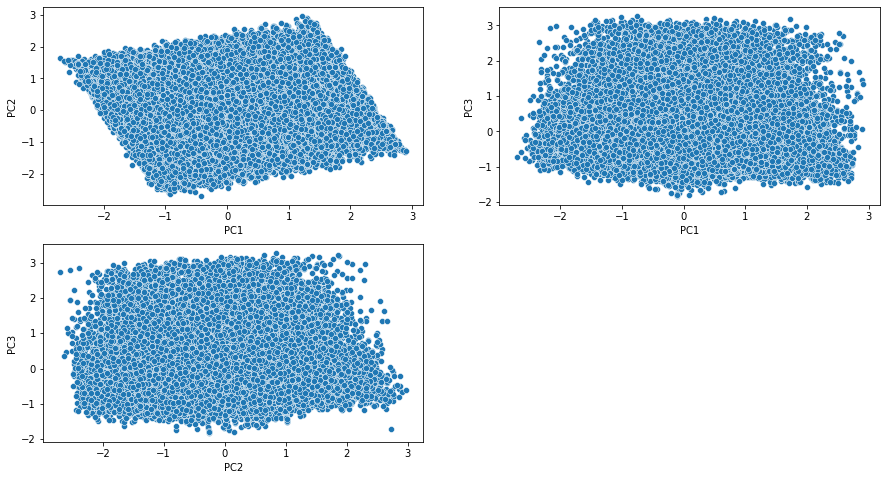

In [2]:
#PCA

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=pca_fit, columns=['PC1','PC2','PC3'])
df_pca.head()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2',ax=ax[0][0])
sns.scatterplot(data=df_pca, x='PC1', y='PC3',ax=ax[0][1])
sns.scatterplot(data=df_pca, x='PC2', y='PC3',ax=ax[1][0])
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
fig.delaxes(ax[1][1])

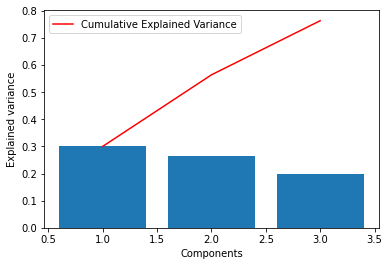

In [3]:
# Cumulative explained variance

import numpy as np

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

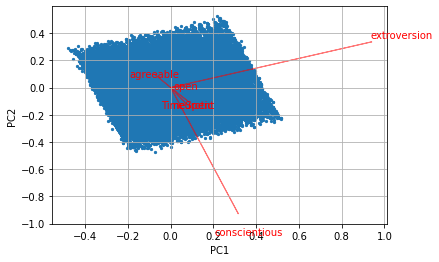

In [4]:
# Biplot

def my_plot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'red', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

my_plot(pca_fit[:, 0:2], np.transpose(pca.components_[0:2, :]), list(df_model.columns))
plt.show()

In [5]:
# Loadings matrix

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_model.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3
variable,,,
extroversion,0.937870,0.335259,-0.023001
neurotic,0.090017,-0.111767,-0.021109
agreeable,-0.068396,0.088861,0.054789
conscientious,0.315276,-0.924597,-0.119276
open,0.060607,0.010968,-0.032334
TimeSpent,0.067436,-0.110513,0.990329


In [6]:
# Varimax rotation
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method='principal', rotation="varimax")
fa_fit = fa.fit_transform(df_model)
loadings = fa.loadings_
fa.get_factor_variance()[2]

array([0.20706663, 0.40060034, 0.56983933])

In [7]:
# Varimax loadings matrix
pd.DataFrame.from_records(loadings)

,0,1,2
0,0.044118,0.479525,0.566465
1,0.724959,0.044679,0.119502
2,-0.244999,-0.566861,0.266013
3,0.800772,0.008008,-0.042561
4,-0.098345,0.754458,0.048331
5,0.062892,-0.196620,0.778049


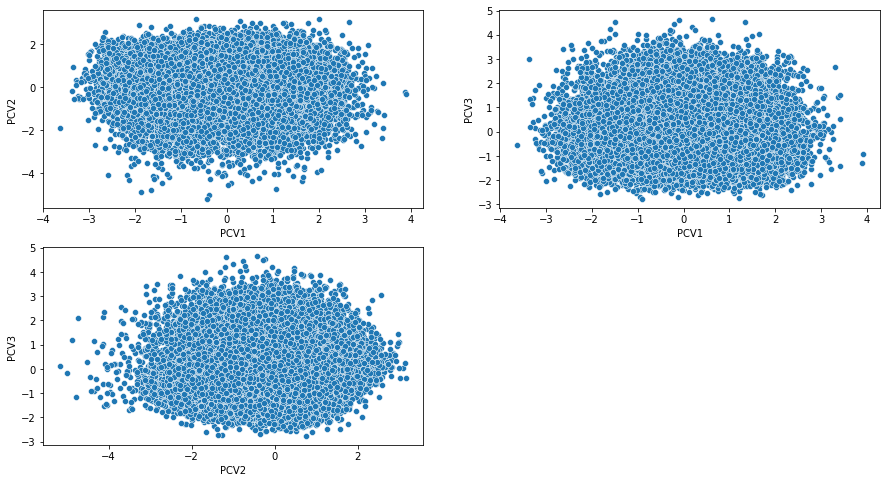

In [8]:
# New Principal Components after varimax 
df_fa = pd.DataFrame(data=fa_fit, columns=['PCV1', 'PCV2','PCV3'])
df_fa.head()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
sns.scatterplot(data=df_fa, x='PCV1', y='PCV2',ax=ax[0][0])
sns.scatterplot(data=df_fa, x='PCV1', y='PCV3',ax=ax[0][1])
sns.scatterplot(data=df_fa, x='PCV2', y='PCV3',ax=ax[1][0])
fig.delaxes(ax[1][1])

In [9]:
# Hopkins Statistic

from pyclustertend import hopkins

1-hopkins(df_model, df_model.shape[0])

0.7394046576506141